In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
from modules import *
from simyt import *
from read_ramses import get_halo_cat


In [85]:
# choose simulation
sim_round = 8
sim_name = "temploc"
sim_dir = move_to_sim_dir(sim_round, sim_name)
print()

dump = get_dump(a_exp=0.1)
info = get_info(dump)

print("Dump: %d" % dump)
print("a_exp: %.3g" % info.a_exp)
print("Maximum AMR level: %d" % info.amr_level_max)


Moving to directory '/home/za9132/scratch/romain/round8/temploc'.

Dump: 20
a_exp: 0.0708
Maximum AMR level: 13


In [86]:
use_cubic = False
use_override = True

halo_cat = get_halo_cat(dump, cgs=True)
biggest_halo_idx = np.argmax(halo_cat.mass)
biggest_halo_coord_mass = halo_cat.coord[:, biggest_halo_idx]
biggest_halo_coord_cubic = get_biggest_halo_coord_cubic(info.a_exp) * info.length_unit
biggest_halo_coord_override = np.array([0.50854452, 0.51014626, 0.49494791]) * info.length_unit

print("Halo coord (mass): (%.5g, %.5g, %.5g)" % tuple(biggest_halo_coord_mass / info.length_unit))
print("Halo coord (cubic): (%.5g, %.5g, %.5g)" % tuple(biggest_halo_coord_cubic / info.length_unit))

if use_override: 
    biggest_halo_coord = biggest_halo_coord_override
elif use_cubic:
    biggest_halo_coord = biggest_halo_coord_cubic
else:
    biggest_halo_coord = biggest_halo_coord_mass
    
biggest_halo_coord_code = biggest_halo_coord / info.length_unit


Halo coord (mass): (0.50808, 0.50962, 0.49534)
Halo coord (cubic): (0.50807, 0.50947, 0.4954)


In [87]:
sim = SimYT(sim_round, sim_name, dump, biggest_halo_coord)


Moving to directory '/home/za9132/scratch/romain/round8/temploc'.


yt : [INFO     ] 2023-12-21 11:40:23,593 Parameters: current_time              = 4.759295047513413
yt : [INFO     ] 2023-12-21 11:40:23,594 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2023-12-21 11:40:23,594 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-12-21 11:40:23,594 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2023-12-21 11:40:23,595 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-12-21 11:40:23,595 Parameters: current_redshift          = 13.119058152052222
yt : [INFO     ] 2023-12-21 11:40:23,595 Parameters: omega_lambda              = 0.723999977111816
yt : [INFO     ] 2023-12-21 11:40:23,596 Parameters: omega_matter              = 0.275999993085861
yt : [INFO     ] 2023-12-21 11:40:23,596 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2023-12-21 11:40:23,596 Parameters: hubble_constant           = 0.703000030517578
yt : [WARNING  ] 2023-12-21 11:40:45,559 The DM particle 

Saved figure as 'jeans_test-122020231816.png'


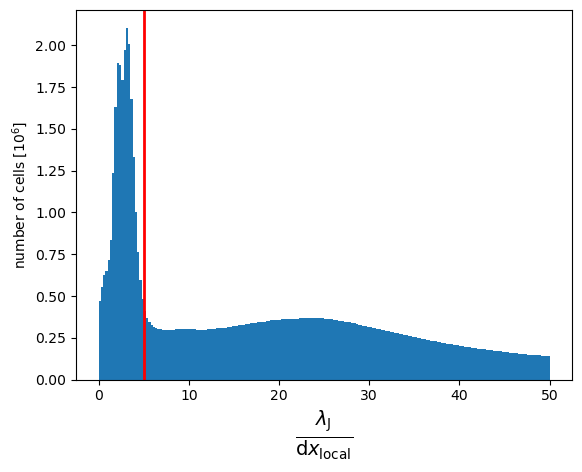

In [26]:
density = sim.ad["density"].value
pressure = sim.ad["pressure"].value
dx = sim.ad["dx"].value
level = sim.ad["grid_level"].value
cond = (level < np.max(level)) * (level > 1)

jeans_length = np.sqrt(pressure / density) / np.sqrt(const.G * density)
jeans_per_cell = jeans_length / dx

plt.hist(jeans_per_cell[cond], range=(0, 50), bins=200, weights=np.full_like(jeans_per_cell[cond], 1e-6));
plt.axvline(x=5, lw=2, color='red')
plt.xlabel(r'$\frac{\lambda_{\rm J}}{{\rm d}x_{\rm local}}$', fontsize=20)
plt.ylabel("number of cells [$10^{6}$]")

save_fig('jeans_test')


yt : [INFO     ] 2023-12-19 13:02:01,697 Making a fixed resolution buffer of (density) 500 by 500
yt : [INFO     ] 2023-12-19 13:02:02,961 Making a fixed resolution buffer of (pressure) 500 by 500
yt : [INFO     ] 2023-12-19 13:02:04,101 Making a fixed resolution buffer of (dx) 500 by 500
yt : [INFO     ] 2023-12-19 13:02:04,129 Making a fixed resolution buffer of (grid_level) 500 by 500


Text(0, 0.5, 'number of cells [$10^{3}$]')

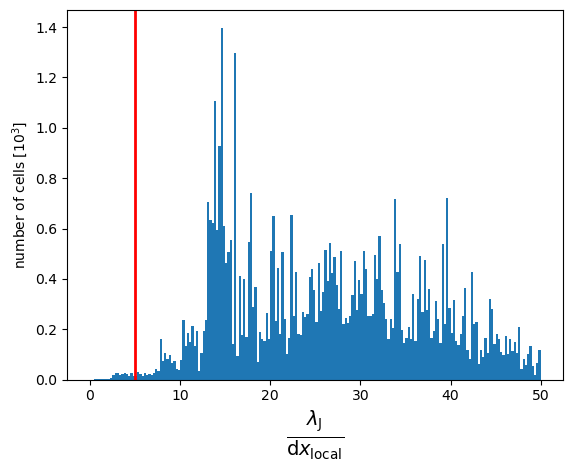

In [41]:
sim._frb(box_size=(10*const.kpc))

density = sim.frb["density"].value
pressure = sim.frb["pressure"].value
dx = sim.frb["dx"].value
level = sim.frb["grid_level"].value
cond = (level < np.max(level)) * (level > 1)

jeans_length = np.sqrt(pressure / density) / np.sqrt(const.G * density)
jeans_per_cell = jeans_length / dx

plt.hist(jeans_per_cell[cond], range=(0, 50), bins=200, weights=np.full_like(jeans_per_cell[cond], 1e-3));
plt.axvline(x=5, lw=2, color='red')
plt.xlabel(r'$\frac{\lambda_{\rm J}}{{\rm d}x_{\rm local}}$', fontsize=20)
plt.ylabel("number of cells [$10^{3}$]")



yt : [INFO     ] 2023-12-20 18:17:44,147 Making a fixed resolution buffer of (density) 500 by 500


Saved figure as 'density_smallbox-122020231817.png'


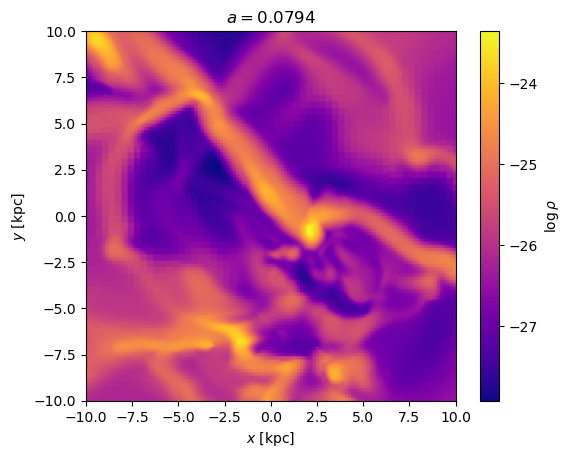

In [34]:
sim.slice('density', box_size=(20*const.kpc), do_log=True, label=r'$\log \rho$', cmap='plasma')
save_fig('density_smallbox')


yt : [INFO     ] 2023-12-20 18:17:49,023 Making a fixed resolution buffer of (hydro_scalar_03) 500 by 500


Saved figure as 'bturb_smallbox-122020231817.png'


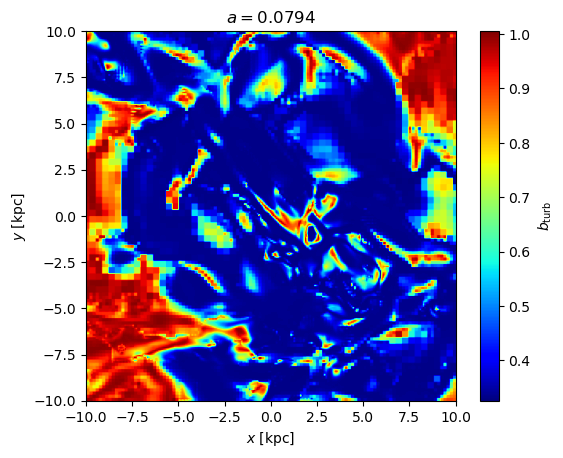

In [35]:
sim.slice('hydro_scalar_03', box_size=(20*const.kpc), label=r'$b_{\rm turb}$', cmap='jet')

save_fig('bturb_smallbox')


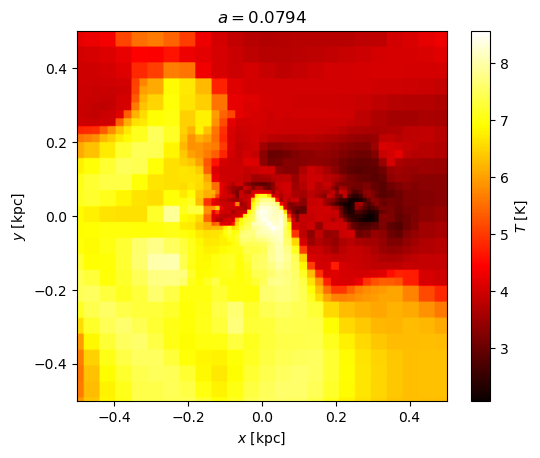

In [48]:
sim.slice('temperature', box_size=(1*const.kpc), label=r'$T$ [${\rm K}$]', cmap='hot', do_log=True)


yt : [INFO     ] 2023-12-18 13:43:15,271 Making a fixed resolution buffer of (vorticity_magnitude) 500 by 500
yt : [WARNING  ] 2023-12-18 13:43:16,545 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2, coord=0.4955592155, domain=RAMSESDomainFile: 1, ds=info_00027.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-18 13:43:16,606 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2, coord=0.4955592155, domain=RAMSESDomainFile: 2, ds=info_00027.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-18 13:43:16,678 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2, coord=0.4955592155, domain=RAMSESDomainFile: 3, ds=info_00027.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING 

yt : [WARNING  ] 2023-12-18 13:43:18,015 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2, coord=0.4955592155, domain=RAMSESDomainFile: 122, ds=info_00027.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-18 13:43:18,068 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2, coord=0.4955592155, domain=RAMSESDomainFile: 123, ds=info_00027.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-18 13:43:18,120 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2, coord=0.4955592155, domain=RAMSESDomainFile: 124, ds=info_00027.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-18 13:43:18,159 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2

yt : [WARNING  ] 2023-12-18 13:43:19,309 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2, coord=0.4955592155, domain=RAMSESDomainFile: 209, ds=info_00027.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-18 13:43:19,357 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2, coord=0.4955592155, domain=RAMSESDomainFile: 210, ds=info_00027.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-18 13:43:19,381 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2, coord=0.4955592155, domain=RAMSESDomainFile: 211, ds=info_00027.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-18 13:43:19,426 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2

yt : [WARNING  ] 2023-12-18 13:43:20,503 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2, coord=0.4955592155, domain=RAMSESDomainFile: 381, ds=info_00027.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-18 13:43:20,548 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2, coord=0.4955592155, domain=RAMSESDomainFile: 384, ds=info_00027.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-18 13:43:20,644 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2, coord=0.4955592155, domain=RAMSESDomainFile: 1, ds=info_00027.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-18 13:43:20,681 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2, 

yt : [WARNING  ] 2023-12-18 13:43:21,598 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2, coord=0.4955592155, domain=RAMSESDomainFile: 120, ds=info_00027.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-18 13:43:21,650 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2, coord=0.4955592155, domain=RAMSESDomainFile: 121, ds=info_00027.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-18 13:43:21,688 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2, coord=0.4955592155, domain=RAMSESDomainFile: 122, ds=info_00027.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-18 13:43:21,730 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2

yt : [WARNING  ] 2023-12-18 13:43:22,579 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2, coord=0.4955592155, domain=RAMSESDomainFile: 207, ds=info_00027.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-18 13:43:22,702 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2, coord=0.4955592155, domain=RAMSESDomainFile: 208, ds=info_00027.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-18 13:43:22,729 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2, coord=0.4955592155, domain=RAMSESDomainFile: 209, ds=info_00027.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-18 13:43:22,780 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2

yt : [WARNING  ] 2023-12-18 13:43:23,696 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2, coord=0.4955592155, domain=RAMSESDomainFile: 308, ds=info_00027.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-18 13:43:23,741 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2, coord=0.4955592155, domain=RAMSESDomainFile: 380, ds=info_00027.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-18 13:43:23,782 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2, coord=0.4955592155, domain=RAMSESDomainFile: 381, ds=info_00027.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-18 13:43:23,813 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2

yt : [WARNING  ] 2023-12-18 13:43:24,715 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2, coord=0.4955592155, domain=RAMSESDomainFile: 114, ds=info_00027.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-18 13:43:24,752 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2, coord=0.4955592155, domain=RAMSESDomainFile: 115, ds=info_00027.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-18 13:43:24,805 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2, coord=0.4955592155, domain=RAMSESDomainFile: 120, ds=info_00027.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-18 13:43:24,857 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2

yt : [WARNING  ] 2023-12-18 13:43:25,740 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2, coord=0.4955592155, domain=RAMSESDomainFile: 205, ds=info_00027.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-18 13:43:25,766 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2, coord=0.4955592155, domain=RAMSESDomainFile: 206, ds=info_00027.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-18 13:43:25,791 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2, coord=0.4955592155, domain=RAMSESDomainFile: 207, ds=info_00027.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-18 13:43:25,828 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2

yt : [WARNING  ] 2023-12-18 13:43:26,628 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2, coord=0.4955592155, domain=RAMSESDomainFile: 306, ds=info_00027.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-18 13:43:26,664 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2, coord=0.4955592155, domain=RAMSESDomainFile: 307, ds=info_00027.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-18 13:43:26,695 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2, coord=0.4955592155, domain=RAMSESDomainFile: 308, ds=info_00027.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-18 13:43:26,741 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2

yt : [WARNING  ] 2023-12-18 13:43:27,721 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2, coord=0.4955592155, domain=RAMSESDomainFile: 100, ds=info_00027.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-18 13:43:27,753 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2, coord=0.4955592155, domain=RAMSESDomainFile: 111, ds=info_00027.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-18 13:43:27,808 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2, coord=0.4955592155, domain=RAMSESDomainFile: 114, ds=info_00027.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-18 13:43:27,853 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2

yt : [WARNING  ] 2023-12-18 13:43:28,865 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2, coord=0.4955592155, domain=RAMSESDomainFile: 203, ds=info_00027.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-18 13:43:28,880 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2, coord=0.4955592155, domain=RAMSESDomainFile: 204, ds=info_00027.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-18 13:43:28,915 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2, coord=0.4955592155, domain=RAMSESDomainFile: 205, ds=info_00027.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-18 13:43:28,939 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2

yt : [WARNING  ] 2023-12-18 13:43:29,700 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2, coord=0.4955592155, domain=RAMSESDomainFile: 278, ds=info_00027.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-18 13:43:29,746 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2, coord=0.4955592155, domain=RAMSESDomainFile: 305, ds=info_00027.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-18 13:43:29,782 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2, coord=0.4955592155, domain=RAMSESDomainFile: 306, ds=info_00027.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-18 13:43:29,816 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2

yt : [WARNING  ] 2023-12-18 13:43:30,694 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2, coord=0.4955592155, domain=RAMSESDomainFile: 70, ds=info_00027.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-18 13:43:30,726 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2, coord=0.4955592155, domain=RAMSESDomainFile: 71, ds=info_00027.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-18 13:43:30,793 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2, coord=0.4955592155, domain=RAMSESDomainFile: 100, ds=info_00027.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-18 13:43:30,825 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2, 

yt : [WARNING  ] 2023-12-18 13:43:31,783 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2, coord=0.4955592155, domain=RAMSESDomainFile: 178, ds=info_00027.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-18 13:43:31,812 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2, coord=0.4955592155, domain=RAMSESDomainFile: 180, ds=info_00027.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-18 13:43:31,845 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2, coord=0.4955592155, domain=RAMSESDomainFile: 203, ds=info_00027.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-18 13:43:31,860 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2

yt : [WARNING  ] 2023-12-18 13:43:32,812 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2, coord=0.4955592155, domain=RAMSESDomainFile: 271, ds=info_00027.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-18 13:43:32,858 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2, coord=0.4955592155, domain=RAMSESDomainFile: 273, ds=info_00027.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-18 13:43:32,897 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2, coord=0.4955592155, domain=RAMSESDomainFile: 278, ds=info_00027.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-18 13:43:32,951 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2

yt : [WARNING  ] 2023-12-18 13:43:33,854 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2, coord=0.4955592155, domain=RAMSESDomainFile: 68, ds=info_00027.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-18 13:43:33,878 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2, coord=0.4955592155, domain=RAMSESDomainFile: 69, ds=info_00027.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-18 13:43:33,904 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2, coord=0.4955592155, domain=RAMSESDomainFile: 70, ds=info_00027.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-18 13:43:33,935 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2, c

yt : [WARNING  ] 2023-12-18 13:43:34,894 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2, coord=0.4955592155, domain=RAMSESDomainFile: 158, ds=info_00027.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-18 13:43:34,937 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2, coord=0.4955592155, domain=RAMSESDomainFile: 159, ds=info_00027.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-18 13:43:34,958 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2, coord=0.4955592155, domain=RAMSESDomainFile: 178, ds=info_00027.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-18 13:43:34,989 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2

yt : [WARNING  ] 2023-12-18 13:43:35,765 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2, coord=0.4955592155, domain=RAMSESDomainFile: 256, ds=info_00027.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-18 13:43:35,784 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2, coord=0.4955592155, domain=RAMSESDomainFile: 258, ds=info_00027.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-18 13:43:35,806 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2, coord=0.4955592155, domain=RAMSESDomainFile: 271, ds=info_00027.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-18 13:43:35,847 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2

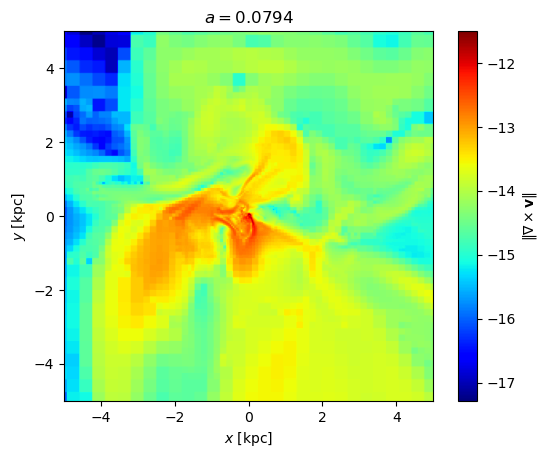

In [7]:
sim.slice('vorticity_magnitude', box_size=(10*const.kpc), label=r'$\|\nabla \times \mathbf{v}\|$', cmap='jet', do_log=True)


yt : [INFO     ] 2023-12-17 22:12:36,616 Making a fixed resolution buffer of (velocity_divergence) 500 by 500
yt : [WARNING  ] 2023-12-17 22:12:36,760 RAMSESDomainSubset (info_00025): , base_region=YTSlice (info_00025): , axis=2, coord=0.4958379846, domain=RAMSESDomainFile: 1, ds=info_00025.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-17 22:12:36,832 RAMSESDomainSubset (info_00025): , base_region=YTSlice (info_00025): , axis=2, coord=0.4958379846, domain=RAMSESDomainFile: 2, ds=info_00025.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-17 22:12:36,902 RAMSESDomainSubset (info_00025): , base_region=YTSlice (info_00025): , axis=2, coord=0.4958379846, domain=RAMSESDomainFile: 3, ds=info_00025.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING 

yt : [WARNING  ] 2023-12-17 22:12:39,077 RAMSESDomainSubset (info_00025): , base_region=YTSlice (info_00025): , axis=2, coord=0.4958379846, domain=RAMSESDomainFile: 119, ds=info_00025.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-17 22:12:39,162 RAMSESDomainSubset (info_00025): , base_region=YTSlice (info_00025): , axis=2, coord=0.4958379846, domain=RAMSESDomainFile: 120, ds=info_00025.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-17 22:12:39,259 RAMSESDomainSubset (info_00025): , base_region=YTSlice (info_00025): , axis=2, coord=0.4958379846, domain=RAMSESDomainFile: 121, ds=info_00025.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-17 22:12:39,334 RAMSESDomainSubset (info_00025): , base_region=YTSlice (info_00025): , axis=2

yt : [WARNING  ] 2023-12-17 22:12:41,111 RAMSESDomainSubset (info_00025): , base_region=YTSlice (info_00025): , axis=2, coord=0.4958379846, domain=RAMSESDomainFile: 210, ds=info_00025.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-17 22:12:41,210 RAMSESDomainSubset (info_00025): , base_region=YTSlice (info_00025): , axis=2, coord=0.4958379846, domain=RAMSESDomainFile: 212, ds=info_00025.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-17 22:12:41,286 RAMSESDomainSubset (info_00025): , base_region=YTSlice (info_00025): , axis=2, coord=0.4958379846, domain=RAMSESDomainFile: 215, ds=info_00025.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-17 22:12:41,364 RAMSESDomainSubset (info_00025): , base_region=YTSlice (info_00025): , axis=2

/home/za9132/.local/lib/python3.10/site-packages/unyt/array.py:1802: RuntimeWarning: invalid value encountered in log10
  out_arr = func(np.asarray(inp), out=out_func, **kwargs)


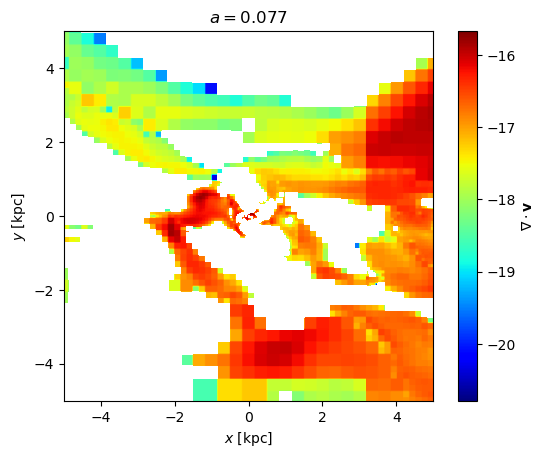

In [42]:
sim.slice('velocity_divergence', box_size=(10*const.kpc), label=r'$\nabla \cdot \mathbf{v}$', cmap='jet', do_log=True)


yt : [INFO     ] 2023-12-18 13:44:15,103 Making a fixed resolution buffer of (bturb) 500 by 500
yt : [WARNING  ] 2023-12-18 13:44:16,342 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2, coord=0.4955592155, domain=RAMSESDomainFile: 1, ds=info_00027.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-18 13:44:16,382 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2, coord=0.4955592155, domain=RAMSESDomainFile: 2, ds=info_00027.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-18 13:44:16,430 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2, coord=0.4955592155, domain=RAMSESDomainFile: 3, ds=info_00027.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-18 

yt : [WARNING  ] 2023-12-18 13:44:17,604 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2, coord=0.4955592155, domain=RAMSESDomainFile: 122, ds=info_00027.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-18 13:44:17,644 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2, coord=0.4955592155, domain=RAMSESDomainFile: 123, ds=info_00027.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-18 13:44:17,682 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2, coord=0.4955592155, domain=RAMSESDomainFile: 124, ds=info_00027.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-18 13:44:17,709 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2

yt : [WARNING  ] 2023-12-18 13:44:18,568 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2, coord=0.4955592155, domain=RAMSESDomainFile: 209, ds=info_00027.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-18 13:44:18,608 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2, coord=0.4955592155, domain=RAMSESDomainFile: 210, ds=info_00027.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-18 13:44:18,629 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2, coord=0.4955592155, domain=RAMSESDomainFile: 211, ds=info_00027.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-18 13:44:18,668 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2

yt : [WARNING  ] 2023-12-18 13:44:19,529 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2, coord=0.4955592155, domain=RAMSESDomainFile: 381, ds=info_00027.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-18 13:44:19,563 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2, coord=0.4955592155, domain=RAMSESDomainFile: 384, ds=info_00027.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-18 13:44:19,630 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2, coord=0.4955592155, domain=RAMSESDomainFile: 1, ds=info_00027.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-18 13:44:19,668 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2, 

yt : [WARNING  ] 2023-12-18 13:44:20,584 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2, coord=0.4955592155, domain=RAMSESDomainFile: 120, ds=info_00027.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-18 13:44:20,636 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2, coord=0.4955592155, domain=RAMSESDomainFile: 121, ds=info_00027.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-18 13:44:20,676 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2, coord=0.4955592155, domain=RAMSESDomainFile: 122, ds=info_00027.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-18 13:44:20,715 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2

yt : [WARNING  ] 2023-12-18 13:44:21,748 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2, coord=0.4955592155, domain=RAMSESDomainFile: 207, ds=info_00027.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-18 13:44:21,792 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2, coord=0.4955592155, domain=RAMSESDomainFile: 208, ds=info_00027.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-18 13:44:21,822 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2, coord=0.4955592155, domain=RAMSESDomainFile: 209, ds=info_00027.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-18 13:44:21,870 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2

yt : [WARNING  ] 2023-12-18 13:44:22,698 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2, coord=0.4955592155, domain=RAMSESDomainFile: 308, ds=info_00027.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-18 13:44:22,740 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2, coord=0.4955592155, domain=RAMSESDomainFile: 380, ds=info_00027.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-18 13:44:22,780 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2, coord=0.4955592155, domain=RAMSESDomainFile: 381, ds=info_00027.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-18 13:44:22,810 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2

yt : [WARNING  ] 2023-12-18 13:44:23,708 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2, coord=0.4955592155, domain=RAMSESDomainFile: 114, ds=info_00027.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-18 13:44:23,747 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2, coord=0.4955592155, domain=RAMSESDomainFile: 115, ds=info_00027.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-18 13:44:23,801 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2, coord=0.4955592155, domain=RAMSESDomainFile: 120, ds=info_00027.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-18 13:44:23,851 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2

yt : [WARNING  ] 2023-12-18 13:44:24,725 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2, coord=0.4955592155, domain=RAMSESDomainFile: 205, ds=info_00027.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-18 13:44:24,750 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2, coord=0.4955592155, domain=RAMSESDomainFile: 206, ds=info_00027.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-18 13:44:24,775 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2, coord=0.4955592155, domain=RAMSESDomainFile: 207, ds=info_00027.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-18 13:44:24,812 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2

yt : [WARNING  ] 2023-12-18 13:44:25,597 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2, coord=0.4955592155, domain=RAMSESDomainFile: 306, ds=info_00027.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-18 13:44:25,631 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2, coord=0.4955592155, domain=RAMSESDomainFile: 307, ds=info_00027.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-18 13:44:25,661 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2, coord=0.4955592155, domain=RAMSESDomainFile: 308, ds=info_00027.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-18 13:44:25,706 RAMSESDomainSubset (info_00027): , base_region=YTSlice (info_00027): , axis=2

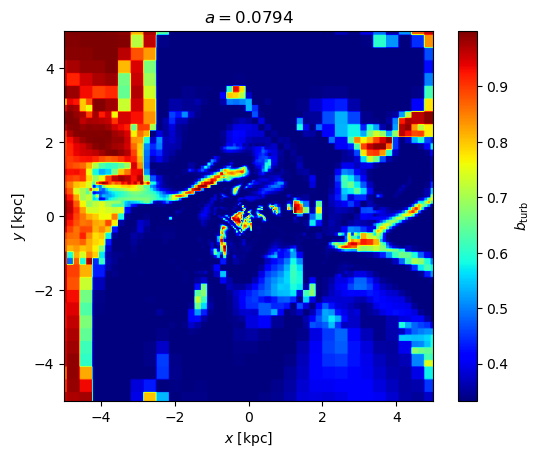

In [10]:
sim.slice('bturb', box_size=(10*const.kpc), label=r'$b_{\rm turb}$', cmap='jet')


In [13]:
sphere = sim.ds.sphere("max", (50.0, "kpc"))


yt : [WARNING  ] 2023-12-17 22:15:59,775 RAMSESDomainSubset (info_00025): , base_region=YTSlice (info_00025): , axis=2, coord=1.676349058067726e+25 cm, domain=RAMSESDomainFile: 1, ds=info_00025.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-17 22:15:59,824 RAMSESDomainSubset (info_00025): , base_region=YTSlice (info_00025): , axis=2, coord=1.676349058067726e+25 cm, domain=RAMSESDomainFile: 2, ds=info_00025.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-17 22:15:59,870 RAMSESDomainSubset (info_00025): , base_region=YTSlice (info_00025): , axis=2, coord=1.676349058067726e+25 cm, domain=RAMSESDomainFile: 3, ds=info_00025.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-17 22:15:59,952 RAMSESDomainSubset (info_00025): , base_region=

yt : [WARNING  ] 2023-12-17 22:16:00,880 RAMSESDomainSubset (info_00025): , base_region=YTSlice (info_00025): , axis=2, coord=1.676349058067726e+25 cm, domain=RAMSESDomainFile: 118, ds=info_00025.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-17 22:16:00,933 RAMSESDomainSubset (info_00025): , base_region=YTSlice (info_00025): , axis=2, coord=1.676349058067726e+25 cm, domain=RAMSESDomainFile: 119, ds=info_00025.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-17 22:16:00,977 RAMSESDomainSubset (info_00025): , base_region=YTSlice (info_00025): , axis=2, coord=1.676349058067726e+25 cm, domain=RAMSESDomainFile: 120, ds=info_00025.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-17 22:16:01,028 RAMSESDomainSubset (info_00025): , base_r

yt : [WARNING  ] 2023-12-17 22:16:02,027 RAMSESDomainSubset (info_00025): , base_region=YTSlice (info_00025): , axis=2, coord=1.676349058067726e+25 cm, domain=RAMSESDomainFile: 208, ds=info_00025.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-17 22:16:02,054 RAMSESDomainSubset (info_00025): , base_region=YTSlice (info_00025): , axis=2, coord=1.676349058067726e+25 cm, domain=RAMSESDomainFile: 209, ds=info_00025.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-17 22:16:02,080 RAMSESDomainSubset (info_00025): , base_region=YTSlice (info_00025): , axis=2, coord=1.676349058067726e+25 cm, domain=RAMSESDomainFile: 210, ds=info_00025.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-17 22:16:02,131 RAMSESDomainSubset (info_00025): , base_r

yt : [WARNING  ] 2023-12-17 22:16:03,063 RAMSESDomainSubset (info_00025): , base_region=YTSlice (info_00025): , axis=2, coord=1.676349058067726e+25 cm, domain=RAMSESDomainFile: 379, ds=info_00025.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-17 22:16:03,110 RAMSESDomainSubset (info_00025): , base_region=YTSlice (info_00025): , axis=2, coord=1.676349058067726e+25 cm, domain=RAMSESDomainFile: 380, ds=info_00025.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-17 22:16:03,142 RAMSESDomainSubset (info_00025): , base_region=YTSlice (info_00025): , axis=2, coord=1.676349058067726e+25 cm, domain=RAMSESDomainFile: 384, ds=info_00025.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-17 22:16:03,220 RAMSESDomainSubset (info_00025): , base_r

yt : [WARNING  ] 2023-12-17 22:16:03,984 RAMSESDomainSubset (info_00025): , base_region=YTSlice (info_00025): , axis=2, coord=1.676349058067726e+25 cm, domain=RAMSESDomainFile: 110, ds=info_00025.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-17 22:16:04,016 RAMSESDomainSubset (info_00025): , base_region=YTSlice (info_00025): , axis=2, coord=1.676349058067726e+25 cm, domain=RAMSESDomainFile: 111, ds=info_00025.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-17 22:16:04,049 RAMSESDomainSubset (info_00025): , base_region=YTSlice (info_00025): , axis=2, coord=1.676349058067726e+25 cm, domain=RAMSESDomainFile: 112, ds=info_00025.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-17 22:16:04,081 RAMSESDomainSubset (info_00025): , base_r

yt : [WARNING  ] 2023-12-17 22:16:04,913 RAMSESDomainSubset (info_00025): , base_region=YTSlice (info_00025): , axis=2, coord=1.676349058067726e+25 cm, domain=RAMSESDomainFile: 184, ds=info_00025.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-17 22:16:04,929 RAMSESDomainSubset (info_00025): , base_region=YTSlice (info_00025): , axis=2, coord=1.676349058067726e+25 cm, domain=RAMSESDomainFile: 185, ds=info_00025.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-17 22:16:04,962 RAMSESDomainSubset (info_00025): , base_region=YTSlice (info_00025): , axis=2, coord=1.676349058067726e+25 cm, domain=RAMSESDomainFile: 207, ds=info_00025.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-17 22:16:04,992 RAMSESDomainSubset (info_00025): , base_r

yt : [WARNING  ] 2023-12-17 22:16:05,733 RAMSESDomainSubset (info_00025): , base_region=YTSlice (info_00025): , axis=2, coord=1.676349058067726e+25 cm, domain=RAMSESDomainFile: 305, ds=info_00025.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-17 22:16:05,756 RAMSESDomainSubset (info_00025): , base_region=YTSlice (info_00025): , axis=2, coord=1.676349058067726e+25 cm, domain=RAMSESDomainFile: 306, ds=info_00025.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-17 22:16:05,783 RAMSESDomainSubset (info_00025): , base_region=YTSlice (info_00025): , axis=2, coord=1.676349058067726e+25 cm, domain=RAMSESDomainFile: 307, ds=info_00025.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-17 22:16:05,823 RAMSESDomainSubset (info_00025): , base_r

yt : [WARNING  ] 2023-12-17 22:16:06,593 RAMSESDomainSubset (info_00025): , base_region=YTSlice (info_00025): , axis=2, coord=1.676349058067726e+25 cm, domain=RAMSESDomainFile: 71, ds=info_00025.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-17 22:16:06,636 RAMSESDomainSubset (info_00025): , base_region=YTSlice (info_00025): , axis=2, coord=1.676349058067726e+25 cm, domain=RAMSESDomainFile: 95, ds=info_00025.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-17 22:16:06,661 RAMSESDomainSubset (info_00025): , base_region=YTSlice (info_00025): , axis=2, coord=1.676349058067726e+25 cm, domain=RAMSESDomainFile: 106, ds=info_00025.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-17 22:16:06,706 RAMSESDomainSubset (info_00025): , base_reg

yt : [WARNING  ] 2023-12-17 22:16:07,541 RAMSESDomainSubset (info_00025): , base_region=YTSlice (info_00025): , axis=2, coord=1.676349058067726e+25 cm, domain=RAMSESDomainFile: 160, ds=info_00025.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-17 22:16:07,558 RAMSESDomainSubset (info_00025): , base_region=YTSlice (info_00025): , axis=2, coord=1.676349058067726e+25 cm, domain=RAMSESDomainFile: 161, ds=info_00025.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-17 22:16:07,600 RAMSESDomainSubset (info_00025): , base_region=YTSlice (info_00025): , axis=2, coord=1.676349058067726e+25 cm, domain=RAMSESDomainFile: 162, ds=info_00025.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-17 22:16:07,625 RAMSESDomainSubset (info_00025): , base_r

yt : [WARNING  ] 2023-12-17 22:16:08,345 RAMSESDomainSubset (info_00025): , base_region=YTSlice (info_00025): , axis=2, coord=1.676349058067726e+25 cm, domain=RAMSESDomainFile: 277, ds=info_00025.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-17 22:16:08,389 RAMSESDomainSubset (info_00025): , base_region=YTSlice (info_00025): , axis=2, coord=1.676349058067726e+25 cm, domain=RAMSESDomainFile: 303, ds=info_00025.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-17 22:16:08,417 RAMSESDomainSubset (info_00025): , base_region=YTSlice (info_00025): , axis=2, coord=1.676349058067726e+25 cm, domain=RAMSESDomainFile: 304, ds=info_00025.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-17 22:16:08,452 RAMSESDomainSubset (info_00025): , base_r

yt : [WARNING  ] 2023-12-17 22:16:09,227 RAMSESDomainSubset (info_00025): , base_region=YTSlice (info_00025): , axis=2, coord=1.676349058067726e+25 cm, domain=RAMSESDomainFile: 68, ds=info_00025.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-17 22:16:09,250 RAMSESDomainSubset (info_00025): , base_region=YTSlice (info_00025): , axis=2, coord=1.676349058067726e+25 cm, domain=RAMSESDomainFile: 69, ds=info_00025.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-17 22:16:09,282 RAMSESDomainSubset (info_00025): , base_region=YTSlice (info_00025): , axis=2, coord=1.676349058067726e+25 cm, domain=RAMSESDomainFile: 70, ds=info_00025.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-17 22:16:09,306 RAMSESDomainSubset (info_00025): , base_regi

yt : [WARNING  ] 2023-12-17 22:16:10,129 RAMSESDomainSubset (info_00025): , base_region=YTSlice (info_00025): , axis=2, coord=1.676349058067726e+25 cm, domain=RAMSESDomainFile: 147, ds=info_00025.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-17 22:16:10,170 RAMSESDomainSubset (info_00025): , base_region=YTSlice (info_00025): , axis=2, coord=1.676349058067726e+25 cm, domain=RAMSESDomainFile: 151, ds=info_00025.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-17 22:16:10,206 RAMSESDomainSubset (info_00025): , base_region=YTSlice (info_00025): , axis=2, coord=1.676349058067726e+25 cm, domain=RAMSESDomainFile: 152, ds=info_00025.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-17 22:16:10,252 RAMSESDomainSubset (info_00025): , base_r

yt : [WARNING  ] 2023-12-17 22:16:10,958 RAMSESDomainSubset (info_00025): , base_region=YTSlice (info_00025): , axis=2, coord=1.676349058067726e+25 cm, domain=RAMSESDomainFile: 256, ds=info_00025.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-17 22:16:10,979 RAMSESDomainSubset (info_00025): , base_region=YTSlice (info_00025): , axis=2, coord=1.676349058067726e+25 cm, domain=RAMSESDomainFile: 269, ds=info_00025.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-17 22:16:11,016 RAMSESDomainSubset (info_00025): , base_region=YTSlice (info_00025): , axis=2, coord=1.676349058067726e+25 cm, domain=RAMSESDomainFile: 272, ds=info_00025.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-17 22:16:11,047 RAMSESDomainSubset (info_00025): , base_r

yt : [WARNING  ] 2023-12-17 22:16:11,852 RAMSESDomainSubset (info_00025): , base_region=YTSlice (info_00025): , axis=2, coord=1.676349058067726e+25 cm, domain=RAMSESDomainFile: 48, ds=info_00025.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-17 22:16:11,893 RAMSESDomainSubset (info_00025): , base_region=YTSlice (info_00025): , axis=2, coord=1.676349058067726e+25 cm, domain=RAMSESDomainFile: 49, ds=info_00025.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-17 22:16:11,923 RAMSESDomainSubset (info_00025): , base_region=YTSlice (info_00025): , axis=2, coord=1.676349058067726e+25 cm, domain=RAMSESDomainFile: 67, ds=info_00025.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-17 22:16:11,941 RAMSESDomainSubset (info_00025): , base_regi

yt : [WARNING  ] 2023-12-17 22:16:12,768 RAMSESDomainSubset (info_00025): , base_region=YTSlice (info_00025): , axis=2, coord=1.676349058067726e+25 cm, domain=RAMSESDomainFile: 144, ds=info_00025.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-17 22:16:12,790 RAMSESDomainSubset (info_00025): , base_region=YTSlice (info_00025): , axis=2, coord=1.676349058067726e+25 cm, domain=RAMSESDomainFile: 145, ds=info_00025.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-17 22:16:12,816 RAMSESDomainSubset (info_00025): , base_region=YTSlice (info_00025): , axis=2, coord=1.676349058067726e+25 cm, domain=RAMSESDomainFile: 146, ds=info_00025.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-17 22:16:12,861 RAMSESDomainSubset (info_00025): , base_r

yt : [WARNING  ] 2023-12-17 22:16:13,656 RAMSESDomainSubset (info_00025): , base_region=YTSlice (info_00025): , axis=2, coord=1.676349058067726e+25 cm, domain=RAMSESDomainFile: 253, ds=info_00025.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-17 22:16:13,684 RAMSESDomainSubset (info_00025): , base_region=YTSlice (info_00025): , axis=2, coord=1.676349058067726e+25 cm, domain=RAMSESDomainFile: 254, ds=info_00025.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-17 22:16:13,698 RAMSESDomainSubset (info_00025): , base_region=YTSlice (info_00025): , axis=2, coord=1.676349058067726e+25 cm, domain=RAMSESDomainFile: 255, ds=info_00025.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-17 22:16:13,708 RAMSESDomainSubset (info_00025): , base_r

yt : [WARNING  ] 2023-12-17 22:16:14,517 RAMSESDomainSubset (info_00025): , base_region=YTSlice (info_00025): , axis=2, coord=1.676349058067726e+25 cm, domain=RAMSESDomainFile: 37, ds=info_00025.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-17 22:16:14,549 RAMSESDomainSubset (info_00025): , base_region=YTSlice (info_00025): , axis=2, coord=1.676349058067726e+25 cm, domain=RAMSESDomainFile: 44, ds=info_00025.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-17 22:16:14,584 RAMSESDomainSubset (info_00025): , base_region=YTSlice (info_00025): , axis=2, coord=1.676349058067726e+25 cm, domain=RAMSESDomainFile: 47, ds=info_00025.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-17 22:16:14,610 RAMSESDomainSubset (info_00025): , base_regi

yt : [WARNING  ] 2023-12-17 22:16:15,415 RAMSESDomainSubset (info_00025): , base_region=YTSlice (info_00025): , axis=2, coord=1.676349058067726e+25 cm, domain=RAMSESDomainFile: 141, ds=info_00025.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-17 22:16:15,476 RAMSESDomainSubset (info_00025): , base_region=YTSlice (info_00025): , axis=2, coord=1.676349058067726e+25 cm, domain=RAMSESDomainFile: 142, ds=info_00025.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-17 22:16:15,504 RAMSESDomainSubset (info_00025): , base_region=YTSlice (info_00025): , axis=2, coord=1.676349058067726e+25 cm, domain=RAMSESDomainFile: 143, ds=info_00025.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-17 22:16:15,522 RAMSESDomainSubset (info_00025): , base_r

yt : [WARNING  ] 2023-12-17 22:16:16,306 RAMSESDomainSubset (info_00025): , base_region=YTSlice (info_00025): , axis=2, coord=1.676349058067726e+25 cm, domain=RAMSESDomainFile: 242, ds=info_00025.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-17 22:16:16,329 RAMSESDomainSubset (info_00025): , base_region=YTSlice (info_00025): , axis=2, coord=1.676349058067726e+25 cm, domain=RAMSESDomainFile: 243, ds=info_00025.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-17 22:16:16,361 RAMSESDomainSubset (info_00025): , base_region=YTSlice (info_00025): , axis=2, coord=1.676349058067726e+25 cm, domain=RAMSESDomainFile: 252, ds=info_00025.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-17 22:16:16,398 RAMSESDomainSubset (info_00025): , base_r

yt : [WARNING  ] 2023-12-17 22:16:17,183 RAMSESDomainSubset (info_00025): , base_region=YTSlice (info_00025): , axis=2, coord=1.676349058067726e+25 cm, domain=RAMSESDomainFile: 33, ds=info_00025.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-17 22:16:17,204 RAMSESDomainSubset (info_00025): , base_region=YTSlice (info_00025): , axis=2, coord=1.676349058067726e+25 cm, domain=RAMSESDomainFile: 34, ds=info_00025.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-17 22:16:17,226 RAMSESDomainSubset (info_00025): , base_region=YTSlice (info_00025): , axis=2, coord=1.676349058067726e+25 cm, domain=RAMSESDomainFile: 36, ds=info_00025.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-17 22:16:17,258 RAMSESDomainSubset (info_00025): , base_regi

yt : [WARNING  ] 2023-12-17 22:16:18,037 RAMSESDomainSubset (info_00025): , base_region=YTSlice (info_00025): , axis=2, coord=1.676349058067726e+25 cm, domain=RAMSESDomainFile: 134, ds=info_00025.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-17 22:16:18,063 RAMSESDomainSubset (info_00025): , base_region=YTSlice (info_00025): , axis=2, coord=1.676349058067726e+25 cm, domain=RAMSESDomainFile: 135, ds=info_00025.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-17 22:16:18,103 RAMSESDomainSubset (info_00025): , base_region=YTSlice (info_00025): , axis=2, coord=1.676349058067726e+25 cm, domain=RAMSESDomainFile: 136, ds=info_00025.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-17 22:16:18,149 RAMSESDomainSubset (info_00025): , base_r

yt : [WARNING  ] 2023-12-17 22:16:18,934 RAMSESDomainSubset (info_00025): , base_region=YTSlice (info_00025): , axis=2, coord=1.676349058067726e+25 cm, domain=RAMSESDomainFile: 235, ds=info_00025.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-17 22:16:18,977 RAMSESDomainSubset (info_00025): , base_region=YTSlice (info_00025): , axis=2, coord=1.676349058067726e+25 cm, domain=RAMSESDomainFile: 236, ds=info_00025.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-17 22:16:19,013 RAMSESDomainSubset (info_00025): , base_region=YTSlice (info_00025): , axis=2, coord=1.676349058067726e+25 cm, domain=RAMSESDomainFile: 237, ds=info_00025.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-17 22:16:19,055 RAMSESDomainSubset (info_00025): , base_r

yt : [WARNING  ] 2023-12-17 22:16:19,828 RAMSESDomainSubset (info_00025): , base_region=YTSlice (info_00025): , axis=2, coord=1.676349058067726e+25 cm, domain=RAMSESDomainFile: 24, ds=info_00025.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-17 22:16:19,862 RAMSESDomainSubset (info_00025): , base_region=YTSlice (info_00025): , axis=2, coord=1.676349058067726e+25 cm, domain=RAMSESDomainFile: 25, ds=info_00025.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-17 22:16:19,898 RAMSESDomainSubset (info_00025): , base_region=YTSlice (info_00025): , axis=2, coord=1.676349058067726e+25 cm, domain=RAMSESDomainFile: 30, ds=info_00025.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-17 22:16:19,934 RAMSESDomainSubset (info_00025): , base_regi

yt : [WARNING  ] 2023-12-17 22:16:20,729 RAMSESDomainSubset (info_00025): , base_region=YTSlice (info_00025): , axis=2, coord=1.676349058067726e+25 cm, domain=RAMSESDomainFile: 130, ds=info_00025.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-17 22:16:20,751 RAMSESDomainSubset (info_00025): , base_region=YTSlice (info_00025): , axis=2, coord=1.676349058067726e+25 cm, domain=RAMSESDomainFile: 132, ds=info_00025.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-17 22:16:20,779 RAMSESDomainSubset (info_00025): , base_region=YTSlice (info_00025): , axis=2, coord=1.676349058067726e+25 cm, domain=RAMSESDomainFile: 133, ds=info_00025.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-17 22:16:20,795 RAMSESDomainSubset (info_00025): , base_r

yt : [WARNING  ] 2023-12-17 22:16:21,569 RAMSESDomainSubset (info_00025): , base_region=YTSlice (info_00025): , axis=2, coord=1.676349058067726e+25 cm, domain=RAMSESDomainFile: 217, ds=info_00025.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-17 22:16:21,618 RAMSESDomainSubset (info_00025): , base_region=YTSlice (info_00025): , axis=2, coord=1.676349058067726e+25 cm, domain=RAMSESDomainFile: 233, ds=info_00025.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-17 22:16:21,641 RAMSESDomainSubset (info_00025): , base_region=YTSlice (info_00025): , axis=2, coord=1.676349058067726e+25 cm, domain=RAMSESDomainFile: 234, ds=info_00025.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-17 22:16:21,675 RAMSESDomainSubset (info_00025): , base_r

yt : [WARNING  ] 2023-12-17 22:16:22,478 RAMSESDomainSubset (info_00025): , base_region=YTSlice (info_00025): , axis=2, coord=1.676349058067726e+25 cm, domain=RAMSESDomainFile: 4, ds=info_00025.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-17 22:16:22,506 RAMSESDomainSubset (info_00025): , base_region=YTSlice (info_00025): , axis=2, coord=1.676349058067726e+25 cm, domain=RAMSESDomainFile: 13, ds=info_00025.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-17 22:16:22,536 RAMSESDomainSubset (info_00025): , base_region=YTSlice (info_00025): , axis=2, coord=1.676349058067726e+25 cm, domain=RAMSESDomainFile: 14, ds=info_00025.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-17 22:16:22,569 RAMSESDomainSubset (info_00025): , base_regio

yt : [WARNING  ] 2023-12-17 22:16:23,337 RAMSESDomainSubset (info_00025): , base_region=YTSlice (info_00025): , axis=2, coord=1.676349058067726e+25 cm, domain=RAMSESDomainFile: 121, ds=info_00025.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-17 22:16:23,374 RAMSESDomainSubset (info_00025): , base_region=YTSlice (info_00025): , axis=2, coord=1.676349058067726e+25 cm, domain=RAMSESDomainFile: 123, ds=info_00025.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-17 22:16:23,431 RAMSESDomainSubset (info_00025): , base_region=YTSlice (info_00025): , axis=2, coord=1.676349058067726e+25 cm, domain=RAMSESDomainFile: 129, ds=info_00025.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-17 22:16:23,459 RAMSESDomainSubset (info_00025): , base_r

yt : [WARNING  ] 2023-12-17 22:16:24,212 RAMSESDomainSubset (info_00025): , base_region=YTSlice (info_00025): , axis=2, coord=1.676349058067726e+25 cm, domain=RAMSESDomainFile: 212, ds=info_00025.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-17 22:16:24,245 RAMSESDomainSubset (info_00025): , base_region=YTSlice (info_00025): , axis=2, coord=1.676349058067726e+25 cm, domain=RAMSESDomainFile: 215, ds=info_00025.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-17 22:16:24,276 RAMSESDomainSubset (info_00025): , base_region=YTSlice (info_00025): , axis=2, coord=1.676349058067726e+25 cm, domain=RAMSESDomainFile: 216, ds=info_00025.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-17 22:16:24,307 RAMSESDomainSubset (info_00025): , base_r

yt : [INFO     ] 2023-12-17 22:16:25,079 xlim = 0.505979 0.506891
yt : [INFO     ] 2023-12-17 22:16:25,079 ylim = 0.507068 0.507980
yt : [INFO     ] 2023-12-17 22:16:25,081 xlim = 0.505979 0.506891
yt : [INFO     ] 2023-12-17 22:16:25,081 ylim = 0.507068 0.507980
yt : [INFO     ] 2023-12-17 22:16:25,082 Making a fixed resolution buffer of (('gas', 'bturb')) 800 by 800



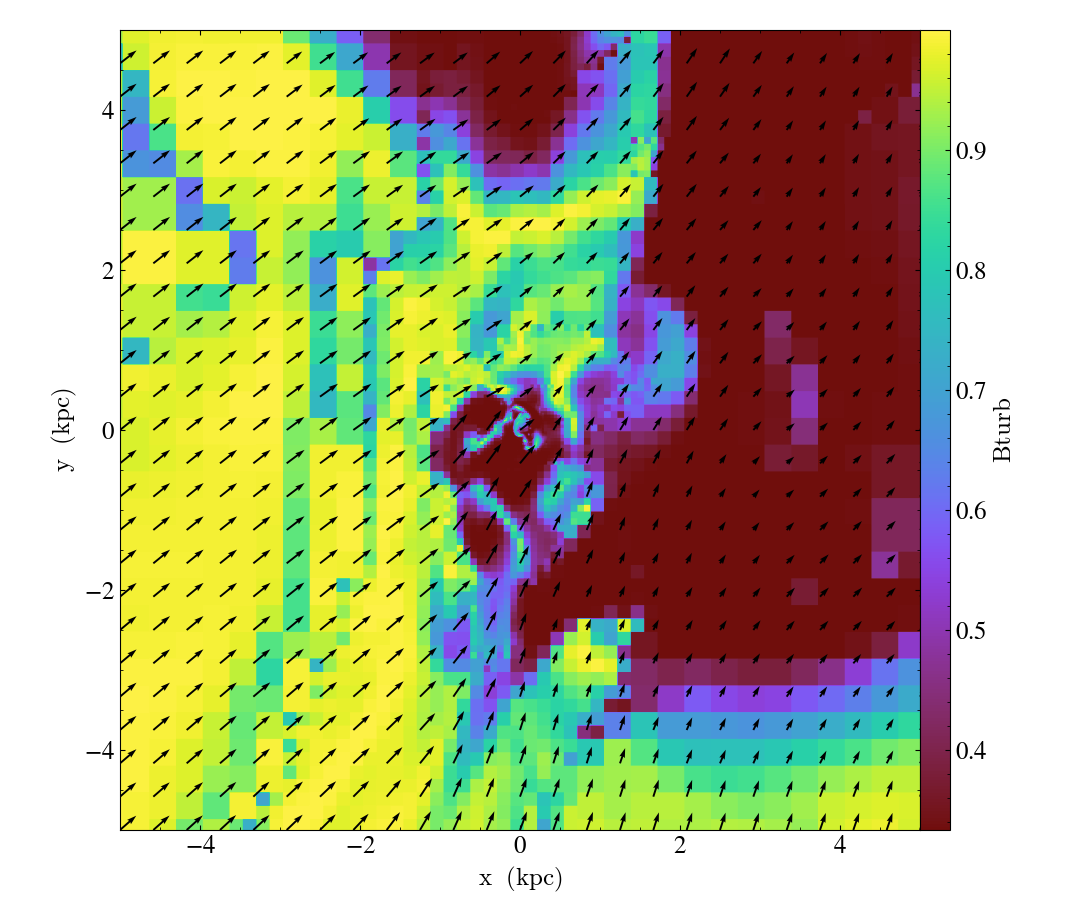

In [49]:
p = yt.SlicePlot(sim.ds, "z", ("gas", "bturb"), width=(10, 'kpc'), center=biggest_halo_coord_code)
p.set_log("bturb", False)
p.annotate_velocity(factor=32)
p
# p.save()


In [96]:
num = 256
box_size = 100 * const.kpc
left_edge = sim.biggest_halo_coord - box_size / 2
left_edge_code = left_edge / sim.length_unit
right_edge_code = (sim.biggest_halo_coord + box_size / 2) / sim.length_unit
sl = sim.ds.slice(Z, sim.biggest_halo_coord_code[Z])
bounds = (left_edge_code[X], right_edge_code[X], left_edge_code[Y], right_edge_code[Y])
frb = FixedResolutionBuffer(sl, bounds, (num, num))


In [97]:
div_v_2d = frb["velocity_x_gradient_x"] + frb["velocity_y_gradient_y"]
curl_v_2d_mag = frb["vorticity_z_new"]
bturb_2d = 1/3 + 2/3 * (div_v_2d**2 / (div_v_2d**2 + curl_v_2d_mag**2))**3
vx = frb["velocity_x"].value
vy = frb["velocity_y"].value
vz = frb["velocity_z"].value
density = frb["density"].value
temp = frb["temperature"].value
x, y = np.meshgrid(np.linspace(-(box_size / const.kpc / 2), (box_size / const.kpc / 2), num), np.linspace(-(box_size / const.kpc / 2), (box_size / const.kpc / 2), num), indexing='ij')


yt : [INFO     ] 2023-12-21 11:43:35,524 Making a fixed resolution buffer of (velocity_x_gradient_x) 256 by 256
yt : [WARNING  ] 2023-12-21 11:43:35,756 RAMSESDomainSubset (info_00020): , base_region=YTSlice (info_00020): , axis=2, coord=0.49494791, domain=RAMSESDomainFile: 1, ds=info_00020.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-21 11:43:35,844 RAMSESDomainSubset (info_00020): , base_region=YTSlice (info_00020): , axis=2, coord=0.49494791, domain=RAMSESDomainFile: 3, ds=info_00020.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-21 11:43:35,943 RAMSESDomainSubset (info_00020): , base_region=YTSlice (info_00020): , axis=2, coord=0.49494791, domain=RAMSESDomainFile: 4, ds=info_00020.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2

yt : [WARNING  ] 2023-12-21 11:43:37,740 RAMSESDomainSubset (info_00020): , base_region=YTSlice (info_00020): , axis=2, coord=0.49494791, domain=RAMSESDomainFile: 64, ds=info_00020.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-21 11:43:37,817 RAMSESDomainSubset (info_00020): , base_region=YTSlice (info_00020): , axis=2, coord=0.49494791, domain=RAMSESDomainFile: 65, ds=info_00020.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-21 11:43:37,879 RAMSESDomainSubset (info_00020): , base_region=YTSlice (info_00020): , axis=2, coord=0.49494791, domain=RAMSESDomainFile: 66, ds=info_00020.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-21 11:43:37,982 RAMSESDomainSubset (info_00020): , base_region=YTSlice (info_00020): , axis=2, coord=0

yt : [WARNING  ] 2023-12-21 11:43:39,921 RAMSESDomainSubset (info_00020): , base_region=YTSlice (info_00020): , axis=2, coord=0.49494791, domain=RAMSESDomainFile: 149, ds=info_00020.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-21 11:43:40,006 RAMSESDomainSubset (info_00020): , base_region=YTSlice (info_00020): , axis=2, coord=0.49494791, domain=RAMSESDomainFile: 155, ds=info_00020.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-21 11:43:40,086 RAMSESDomainSubset (info_00020): , base_region=YTSlice (info_00020): , axis=2, coord=0.49494791, domain=RAMSESDomainFile: 156, ds=info_00020.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-21 11:43:40,154 RAMSESDomainSubset (info_00020): , base_region=YTSlice (info_00020): , axis=2, coor

yt : [WARNING  ] 2023-12-21 11:43:42,287 RAMSESDomainSubset (info_00020): , base_region=YTSlice (info_00020): , axis=2, coord=0.49494791, domain=RAMSESDomainFile: 236, ds=info_00020.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-21 11:43:42,382 RAMSESDomainSubset (info_00020): , base_region=YTSlice (info_00020): , axis=2, coord=0.49494791, domain=RAMSESDomainFile: 237, ds=info_00020.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-21 11:43:42,459 RAMSESDomainSubset (info_00020): , base_region=YTSlice (info_00020): , axis=2, coord=0.49494791, domain=RAMSESDomainFile: 238, ds=info_00020.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-21 11:43:42,522 RAMSESDomainSubset (info_00020): , base_region=YTSlice (info_00020): , axis=2, coor

yt : [WARNING  ] 2023-12-21 11:43:44,308 RAMSESDomainSubset (info_00020): , base_region=YTSlice (info_00020): , axis=2, coord=0.49494791, domain=RAMSESDomainFile: 300, ds=info_00020.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-21 11:43:44,372 RAMSESDomainSubset (info_00020): , base_region=YTSlice (info_00020): , axis=2, coord=0.49494791, domain=RAMSESDomainFile: 301, ds=info_00020.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-21 11:43:44,450 RAMSESDomainSubset (info_00020): , base_region=YTSlice (info_00020): , axis=2, coord=0.49494791, domain=RAMSESDomainFile: 302, ds=info_00020.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-21 11:43:44,508 RAMSESDomainSubset (info_00020): , base_region=YTSlice (info_00020): , axis=2, coor

yt : [WARNING  ] 2023-12-21 11:43:45,667 RAMSESDomainSubset (info_00020): , base_region=YTSlice (info_00020): , axis=2, coord=0.49494791, domain=RAMSESDomainFile: 43, ds=info_00020.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-21 11:43:45,695 RAMSESDomainSubset (info_00020): , base_region=YTSlice (info_00020): , axis=2, coord=0.49494791, domain=RAMSESDomainFile: 44, ds=info_00020.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-21 11:43:45,719 RAMSESDomainSubset (info_00020): , base_region=YTSlice (info_00020): , axis=2, coord=0.49494791, domain=RAMSESDomainFile: 45, ds=info_00020.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-21 11:43:45,734 RAMSESDomainSubset (info_00020): , base_region=YTSlice (info_00020): , axis=2, coord=0

yt : [WARNING  ] 2023-12-21 11:43:46,637 RAMSESDomainSubset (info_00020): , base_region=YTSlice (info_00020): , axis=2, coord=0.49494791, domain=RAMSESDomainFile: 125, ds=info_00020.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-21 11:43:46,666 RAMSESDomainSubset (info_00020): , base_region=YTSlice (info_00020): , axis=2, coord=0.49494791, domain=RAMSESDomainFile: 126, ds=info_00020.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-21 11:43:46,708 RAMSESDomainSubset (info_00020): , base_region=YTSlice (info_00020): , axis=2, coord=0.49494791, domain=RAMSESDomainFile: 133, ds=info_00020.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-21 11:43:46,762 RAMSESDomainSubset (info_00020): , base_region=YTSlice (info_00020): , axis=2, coor

yt : [WARNING  ] 2023-12-21 11:43:47,614 RAMSESDomainSubset (info_00020): , base_region=YTSlice (info_00020): , axis=2, coord=0.49494791, domain=RAMSESDomainFile: 212, ds=info_00020.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-21 11:43:47,649 RAMSESDomainSubset (info_00020): , base_region=YTSlice (info_00020): , axis=2, coord=0.49494791, domain=RAMSESDomainFile: 213, ds=info_00020.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-21 11:43:47,667 RAMSESDomainSubset (info_00020): , base_region=YTSlice (info_00020): , axis=2, coord=0.49494791, domain=RAMSESDomainFile: 225, ds=info_00020.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-21 11:43:47,682 RAMSESDomainSubset (info_00020): , base_region=YTSlice (info_00020): , axis=2, coor

yt : [WARNING  ] 2023-12-21 11:43:48,542 RAMSESDomainSubset (info_00020): , base_region=YTSlice (info_00020): , axis=2, coord=0.49494791, domain=RAMSESDomainFile: 279, ds=info_00020.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-21 11:43:48,561 RAMSESDomainSubset (info_00020): , base_region=YTSlice (info_00020): , axis=2, coord=0.49494791, domain=RAMSESDomainFile: 291, ds=info_00020.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-21 11:43:48,600 RAMSESDomainSubset (info_00020): , base_region=YTSlice (info_00020): , axis=2, coord=0.49494791, domain=RAMSESDomainFile: 292, ds=info_00020.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-21 11:43:48,627 RAMSESDomainSubset (info_00020): , base_region=YTSlice (info_00020): , axis=2, coor

yt : [WARNING  ] 2023-12-21 11:43:50,972 RAMSESDomainSubset (info_00020): , base_region=YTSlice (info_00020): , axis=2, coord=0.49494791, domain=RAMSESDomainFile: 27, ds=info_00020.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-21 11:43:51,007 RAMSESDomainSubset (info_00020): , base_region=YTSlice (info_00020): , axis=2, coord=0.49494791, domain=RAMSESDomainFile: 28, ds=info_00020.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-21 11:43:51,032 RAMSESDomainSubset (info_00020): , base_region=YTSlice (info_00020): , axis=2, coord=0.49494791, domain=RAMSESDomainFile: 30, ds=info_00020.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-21 11:43:51,060 RAMSESDomainSubset (info_00020): , base_region=YTSlice (info_00020): , axis=2, coord=0

yt : [WARNING  ] 2023-12-21 11:43:51,860 RAMSESDomainSubset (info_00020): , base_region=YTSlice (info_00020): , axis=2, coord=0.49494791, domain=RAMSESDomainFile: 104, ds=info_00020.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-21 11:43:51,894 RAMSESDomainSubset (info_00020): , base_region=YTSlice (info_00020): , axis=2, coord=0.49494791, domain=RAMSESDomainFile: 105, ds=info_00020.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-21 11:43:51,921 RAMSESDomainSubset (info_00020): , base_region=YTSlice (info_00020): , axis=2, coord=0.49494791, domain=RAMSESDomainFile: 114, ds=info_00020.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-21 11:43:51,976 RAMSESDomainSubset (info_00020): , base_region=YTSlice (info_00020): , axis=2, coor

yt : [WARNING  ] 2023-12-21 11:43:52,929 RAMSESDomainSubset (info_00020): , base_region=YTSlice (info_00020): , axis=2, coord=0.49494791, domain=RAMSESDomainFile: 166, ds=info_00020.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-21 11:43:52,969 RAMSESDomainSubset (info_00020): , base_region=YTSlice (info_00020): , axis=2, coord=0.49494791, domain=RAMSESDomainFile: 167, ds=info_00020.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-21 11:43:52,994 RAMSESDomainSubset (info_00020): , base_region=YTSlice (info_00020): , axis=2, coord=0.49494791, domain=RAMSESDomainFile: 168, ds=info_00020.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-21 11:43:53,013 RAMSESDomainSubset (info_00020): , base_region=YTSlice (info_00020): , axis=2, coor

yt : [WARNING  ] 2023-12-21 11:43:53,867 RAMSESDomainSubset (info_00020): , base_region=YTSlice (info_00020): , axis=2, coord=0.49494791, domain=RAMSESDomainFile: 269, ds=info_00020.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-21 11:43:53,898 RAMSESDomainSubset (info_00020): , base_region=YTSlice (info_00020): , axis=2, coord=0.49494791, domain=RAMSESDomainFile: 270, ds=info_00020.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-21 11:43:53,937 RAMSESDomainSubset (info_00020): , base_region=YTSlice (info_00020): , axis=2, coord=0.49494791, domain=RAMSESDomainFile: 271, ds=info_00020.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-21 11:43:53,968 RAMSESDomainSubset (info_00020): , base_region=YTSlice (info_00020): , axis=2, coor

yt : [WARNING  ] 2023-12-21 11:43:54,811 RAMSESDomainSubset (info_00020): , base_region=YTSlice (info_00020): , axis=2, coord=0.49494791, domain=RAMSESDomainFile: 4, ds=info_00020.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-21 11:43:54,861 RAMSESDomainSubset (info_00020): , base_region=YTSlice (info_00020): , axis=2, coord=0.49494791, domain=RAMSESDomainFile: 5, ds=info_00020.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-21 11:43:54,902 RAMSESDomainSubset (info_00020): , base_region=YTSlice (info_00020): , axis=2, coord=0.49494791, domain=RAMSESDomainFile: 13, ds=info_00020.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-21 11:43:54,930 RAMSESDomainSubset (info_00020): , base_region=YTSlice (info_00020): , axis=2, coord=0.4

yt : [WARNING  ] 2023-12-21 11:43:55,756 RAMSESDomainSubset (info_00020): , base_region=YTSlice (info_00020): , axis=2, coord=0.49494791, domain=RAMSESDomainFile: 67, ds=info_00020.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-21 11:43:55,789 RAMSESDomainSubset (info_00020): , base_region=YTSlice (info_00020): , axis=2, coord=0.49494791, domain=RAMSESDomainFile: 69, ds=info_00020.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-21 11:43:55,812 RAMSESDomainSubset (info_00020): , base_region=YTSlice (info_00020): , axis=2, coord=0.49494791, domain=RAMSESDomainFile: 70, ds=info_00020.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-21 11:43:55,832 RAMSESDomainSubset (info_00020): , base_region=YTSlice (info_00020): , axis=2, coord=0

yt : [WARNING  ] 2023-12-21 11:43:56,868 RAMSESDomainSubset (info_00020): , base_region=YTSlice (info_00020): , axis=2, coord=0.49494791, domain=RAMSESDomainFile: 157, ds=info_00020.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-21 11:43:56,896 RAMSESDomainSubset (info_00020): , base_region=YTSlice (info_00020): , axis=2, coord=0.49494791, domain=RAMSESDomainFile: 159, ds=info_00020.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-21 11:43:56,933 RAMSESDomainSubset (info_00020): , base_region=YTSlice (info_00020): , axis=2, coord=0.49494791, domain=RAMSESDomainFile: 160, ds=info_00020.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-21 11:43:56,959 RAMSESDomainSubset (info_00020): , base_region=YTSlice (info_00020): , axis=2, coor

yt : [WARNING  ] 2023-12-21 11:43:57,738 RAMSESDomainSubset (info_00020): , base_region=YTSlice (info_00020): , axis=2, coord=0.49494791, domain=RAMSESDomainFile: 247, ds=info_00020.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-21 11:43:57,776 RAMSESDomainSubset (info_00020): , base_region=YTSlice (info_00020): , axis=2, coord=0.49494791, domain=RAMSESDomainFile: 248, ds=info_00020.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-21 11:43:57,821 RAMSESDomainSubset (info_00020): , base_region=YTSlice (info_00020): , axis=2, coord=0.49494791, domain=RAMSESDomainFile: 250, ds=info_00020.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-21 11:43:57,860 RAMSESDomainSubset (info_00020): , base_region=YTSlice (info_00020): , axis=2, coor

yt : [WARNING  ] 2023-12-21 11:43:58,646 RAMSESDomainSubset (info_00020): , base_region=YTSlice (info_00020): , axis=2, coord=0.49494791, domain=RAMSESDomainFile: 304, ds=info_00020.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-21 11:43:58,680 RAMSESDomainSubset (info_00020): , base_region=YTSlice (info_00020): , axis=2, coord=0.49494791, domain=RAMSESDomainFile: 305, ds=info_00020.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-21 11:43:58,715 RAMSESDomainSubset (info_00020): , base_region=YTSlice (info_00020): , axis=2, coord=0.49494791, domain=RAMSESDomainFile: 306, ds=info_00020.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-12-21 11:43:58,733 RAMSESDomainSubset (info_00020): , base_region=YTSlice (info_00020): , axis=2, coor

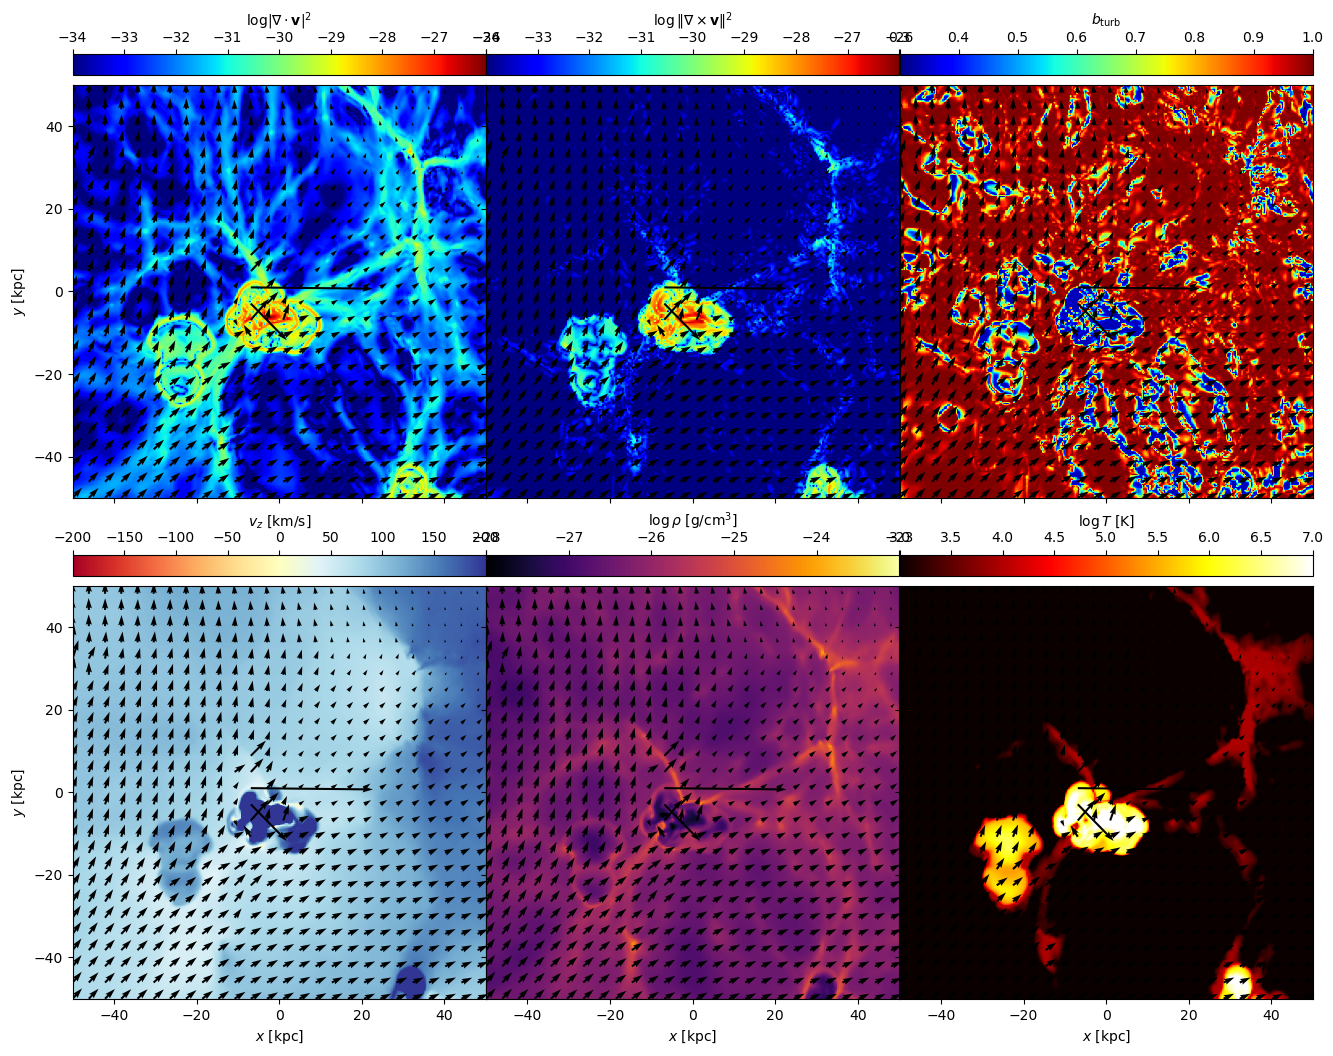

In [98]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(16, 13), sharex=True, sharey=True)

im1 = axs[0, 0].imshow(np.log10(div_v_2d**2), cmap="jet", extent=[-box_size/2/const.kpc, box_size/2/const.kpc, -box_size/2/const.kpc, box_size/2/const.kpc], vmin=-34, vmax=-26, origin='lower')
im2 = axs[0, 1].imshow(np.log10(curl_v_2d_mag**2), cmap="jet", extent=[-box_size/2/const.kpc, box_size/2/const.kpc, -box_size/2/const.kpc, box_size/2/const.kpc], vmin=-34, vmax=-26, origin='lower')
im3 = axs[0, 2].imshow(bturb_2d, cmap="jet", extent=[-box_size/2/const.kpc, box_size/2/const.kpc, -box_size/2/const.kpc, box_size/2/const.kpc], vmin=0.3, vmax=1.0, origin='lower')
im4 = axs[1, 0].imshow(-vz / const.km, cmap="RdYlBu", extent=[-box_size/2/const.kpc, box_size/2/const.kpc, -box_size/2/const.kpc, box_size/2/const.kpc], vmin=-200, vmax=200, origin='lower')
im5 = axs[1, 1].imshow(np.log10(density), cmap="inferno", extent=[-box_size/2/const.kpc, box_size/2/const.kpc, -box_size/2/const.kpc, box_size/2/const.kpc], vmin=-28, vmax=-23, origin='lower')
im6 = axs[1, 2].imshow(np.log10(temp), cmap="hot", extent=[-box_size/2/const.kpc, box_size/2/const.kpc, -box_size/2/const.kpc, box_size/2/const.kpc], vmin=3, vmax=7, origin='lower')

for ax, im, label in zip(axs.flatten(), [im1, im2, im3, im4, im5, im6], [r'$\log |\nabla \cdot \mathbf{v}|^2$', r'$\log \|\nabla \times \mathbf{v}\|^2$', r'$b_{\rm turb}$', r'$v_z$ [${\rm km / s}$]', r'$\log \rho$ [${\rm g/cm^3}$]', r'$\log T$ [${\rm K}$]']): 
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("top", size="5%", pad=0.1)
    plt.colorbar(im, ax=ax, cax=cax, label=label, orientation="horizontal")
    cax.xaxis.set_ticks_position("top")
    cax.xaxis.set_label_position("top")

for i in range(3): axs[1, i].set_xlabel(r'$x$ [${\rm kpc}$]')
for i in range(2): axs[i, 0].set_ylabel(r'$y$ [${\rm kpc}$]')

skip = 10
for ax in axs.flatten(): ax.quiver(x[::skip, ::skip], y[::skip, ::skip], vx[::skip, ::skip], vy[::skip, ::skip], scale=7e8, width=0.005)
    
plt.subplots_adjust(wspace=1e-3, hspace=1e-3)
    
#save_fig('velocity_field_1kpc')
    